In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_estimate(data, n_samples=500000, ci=0.95):
    assert data.shape == (12,)  # should have 12 seeds.
    samples = data[np.random.choice(len(data), size=(len(data), n_samples))]
    samples = np.mean(samples, axis=0)
    mean = np.mean(data)

    delta = (1. - ci) * 0.5
    ci_low = np.quantile(samples, delta)
    ci_high = np.quantile(samples, 1. - delta)
    return mean, ci_low, ci_high, samples

print("Loading experiment data for main results")
data = pkl.load(open("qam-exp-data.pkl", "rb"))
task_keys = set((k[0] for k in data))
methods = set((k[1] for k in data))
print("\t available keys:", task_keys)
print("\t available methods:", methods)

print("Loading experiment data for data quality analysis")
data_quality = pkl.load(open("qam-exp-data-quality.pkl", "rb"))
task_keys = set((k[0] for k in data_quality))
methods = set((k[1] for k in data_quality))
print("\t available keys:", task_keys)
print("\t available methods:", methods)

print("Loading experiment data for hparam sensitivity analysis")
data_sensitive = pkl.load(open("qam-exp-data-sensitive.pkl", "rb"))
task_keys = set((k[0] for k in data_sensitive))
methods = set((k[1] for k in data_sensitive))
print("\t available keys:", task_keys)
print("\t available methods:", methods)

def setup_ax(ax, title=None):
    # ax setup
    ax.set_xlabel('Environment Steps ($\\times 10^4$)')
    ax.set_ylabel('Score')
    ax.set_xlim(-5., 155.)
    ax.set_ylim(-5., 105.0)

    ax.spines["bottom"].set_color("lightgray")
    ax.spines["top"].set_color("lightgray")
    ax.spines["right"].set_color("lightgray")
    ax.spines["left"].set_color("lightgray")
    ax.tick_params(axis="both", which="major", labelsize=10)
    ax.grid(color="lightgray", linewidth=1, alpha=0.5)
    grey = np.array([0.01, 0.01, 0.01])
    ax.axvspan(-5, 100, facecolor=1 - grey * 4.0, alpha=1.0)
    ax.axvspan(100, 155, facecolor=1 - grey * 0.5, alpha=1.0)
    if title is not None:
        ax.set_title(title)

def plot_data(ax, task, name, data_source, label, color=None):
    # sanity check data
    samples = data_source[(task, name)]
    assert samples.shape == (30, 12)

    # compute 95% CI intervals
    means, ci_lows, ci_highs = [0.], [0.], [0.] # assume no success at initialization
    for sample_t in samples:
        mean, ci_low, ci_high, _ = bootstrap_estimate(sample_t) # use last step only
        means.append(mean)
        ci_lows.append(ci_low)
        ci_highs.append(ci_high)

    # plot
    means = np.stack(means, axis=0)
    ci_lows = np.stack(ci_lows, axis=0)
    ci_highs = np.stack(ci_highs, axis=0)
    steps = np.arange(31) * 0.05

    if color is None:
        color = np.array([0.4, 0.31372549, 0.60784314])
    
    ax.plot(steps * 100, means * 100.0, color=color, 
        marker='o',
        linestyle="-",
        markeredgecolor=color,
        markerfacecolor=tuple(map(lambda x: 1. - (1. - x) * 0.5, color)),
        markersize=6.5,
        linewidth=2,
        markeredgewidth=2,
        label=label,
    )
    ax.fill_between(steps * 100, ci_lows * 100.0, ci_highs * 100.0, color=color, alpha=0.2)
    

Loading experiment data for main results
	 available keys: {'cube-double-play-singletask-task4-v0', 'puzzle-4x4-play', 'scene-play-singletask-task2-v0', 'cube-quadruple-play-singletask-task1-v0', 'humanoidmaze-large-navigate-singletask-task3-v0', 'antmaze-large-navigate-singletask-task1-v0', 'antmaze-giant-navigate-singletask-task1-v0', 'scene-play-singletask-task1-v0', 'puzzle-4x4-play-singletask-task2-v0', 'antmaze-large-navigate-singletask-task2-v0', 'cube-quadruple-play-singletask-task5-v0', 'humanoidmaze-large-navigate-singletask-task1-v0', 'antmaze-large-navigate-singletask-task3-v0', 'humanoidmaze-large-navigate-singletask-task5-v0', 'humanoidmaze-medium-navigate-singletask-task2-v0', 'scene-play', 'scene-play-singletask-task4-v0', 'cube-double-play-singletask-task5-v0', 'puzzle-4x4-play-singletask-task3-v0', 'humanoidmaze-medium-navigate-singletask-task4-v0', 'cube-triple-play-singletask-task4-v0', 'antmaze-large-navigate-singletask-task4-v0', 'antmaze-large-navigate-singletask

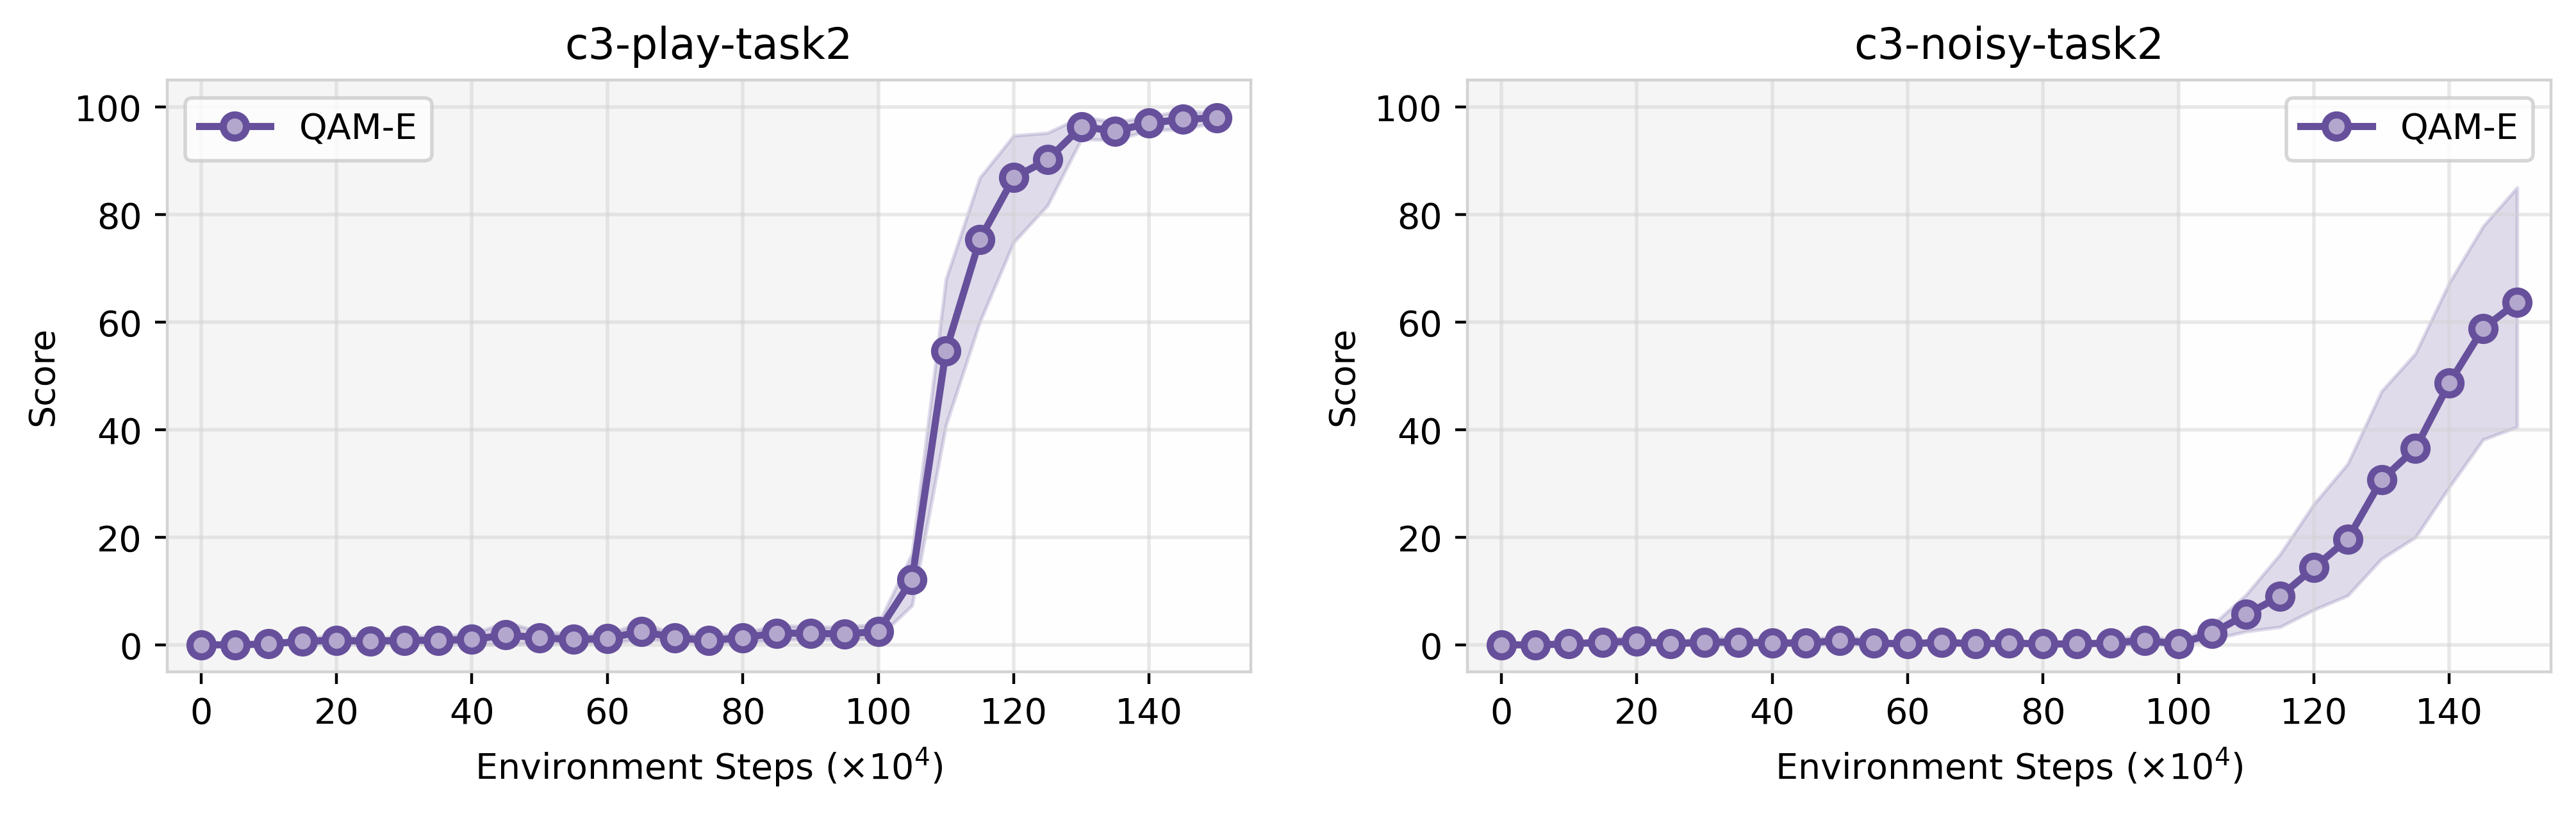

In [2]:
# QAM-E's performance on c3-play-task2 and c3-noisy-task2
fig, (ax_orig, ax_noisy) = plt.subplots(1, 2, figsize=(12, 3), dpi=400)
setup_ax(ax_orig, 'c3-play-task2')
setup_ax(ax_noisy, 'c3-noisy-task2')

plot_data(ax_orig, "cube-triple-play-singletask-task2-v0", "QAM-E", data, label="QAM-E")
plot_data(ax_noisy, "cube-triple-noisy-singletask-task2-v0", "QAM-E", data_quality, label="QAM-E")

ax_orig.legend()
ax_noisy.legend()

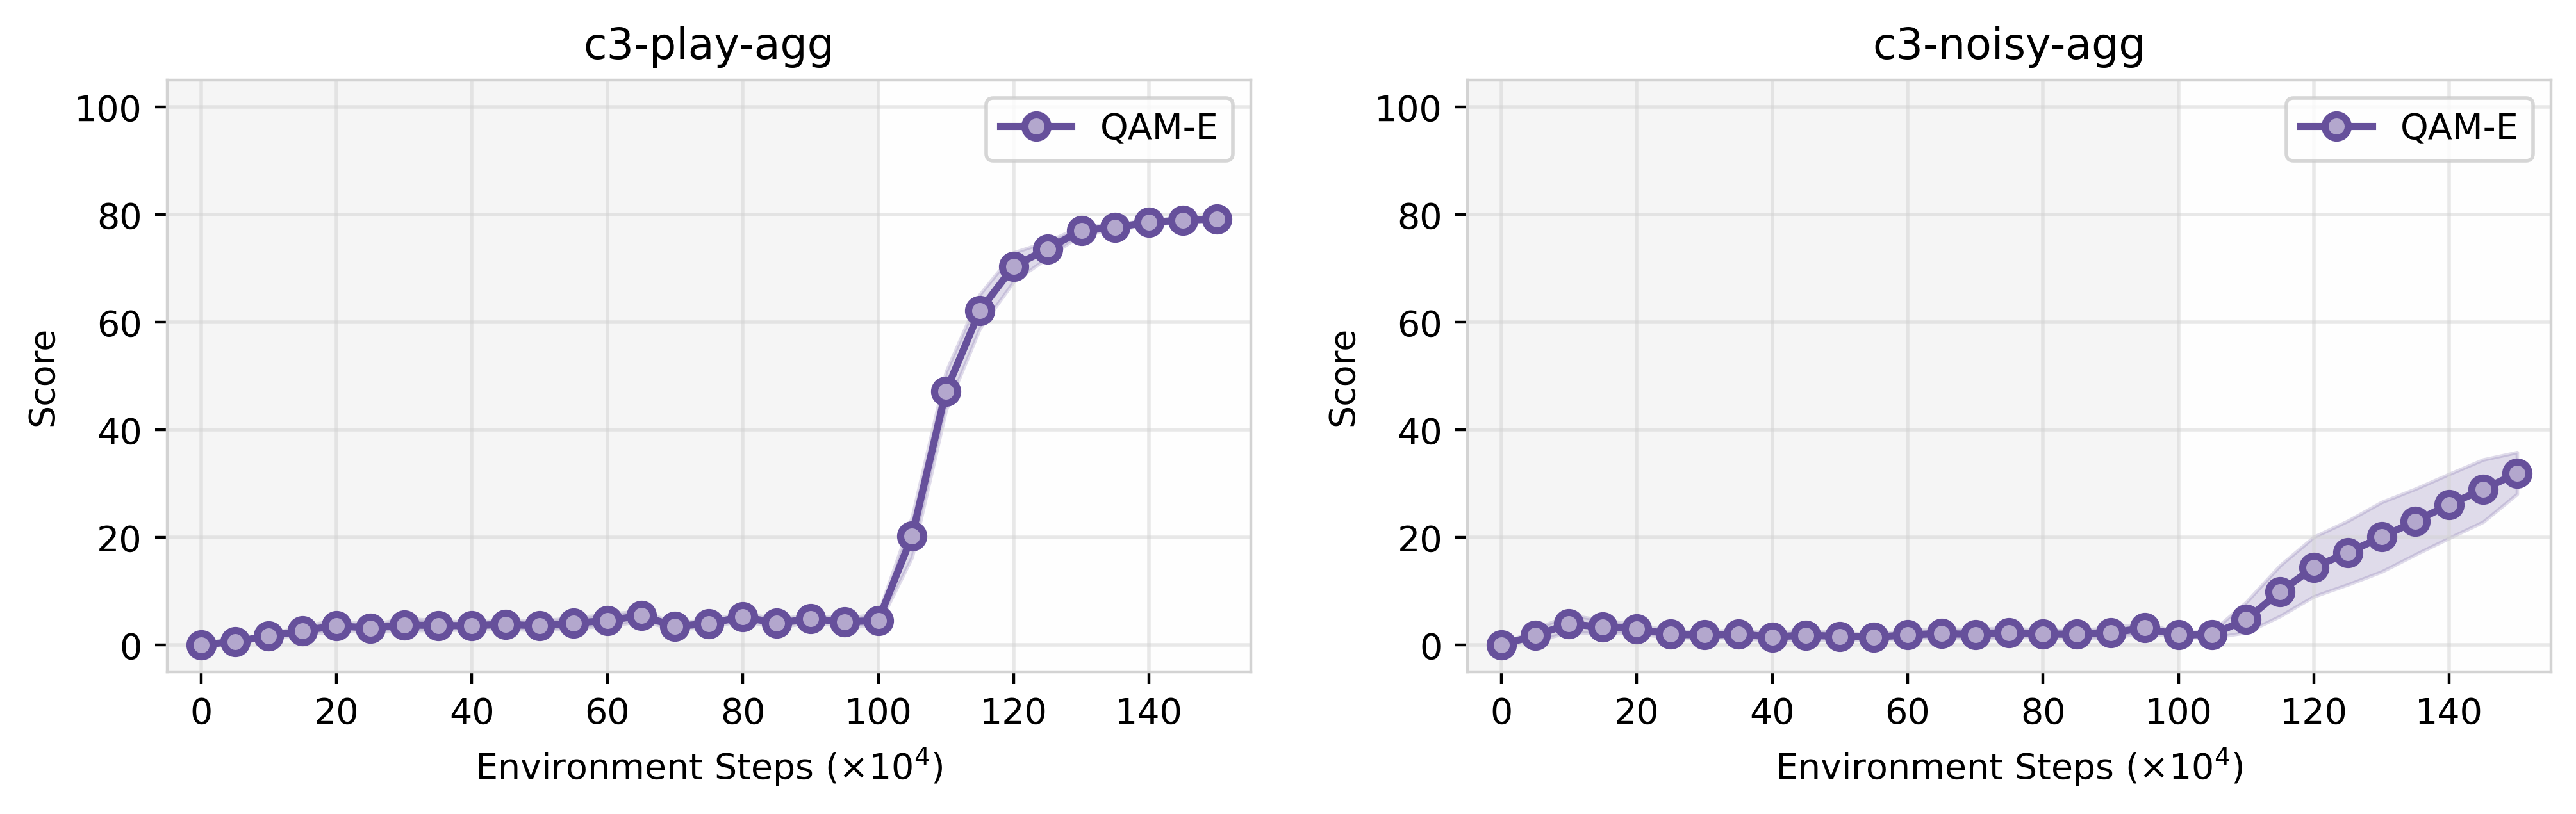

In [4]:
# QAM-E's performance on c3-play and c3-noisy (aggregated over 5 tasks each)
fig, (ax_orig, ax_noisy) = plt.subplots(1, 2, figsize=(12, 3), dpi=400)

setup_ax(ax_orig, 'c3-play-agg')
setup_ax(ax_noisy, 'c3-noisy-agg')

plot_data(ax_orig, "cube-triple-play", "QAM-E", data, label="QAM-E")
plot_data(ax_noisy, "cube-triple-noisy", "QAM-E", data_quality, label="QAM-E")

ax_orig.legend()
ax_noisy.legend()

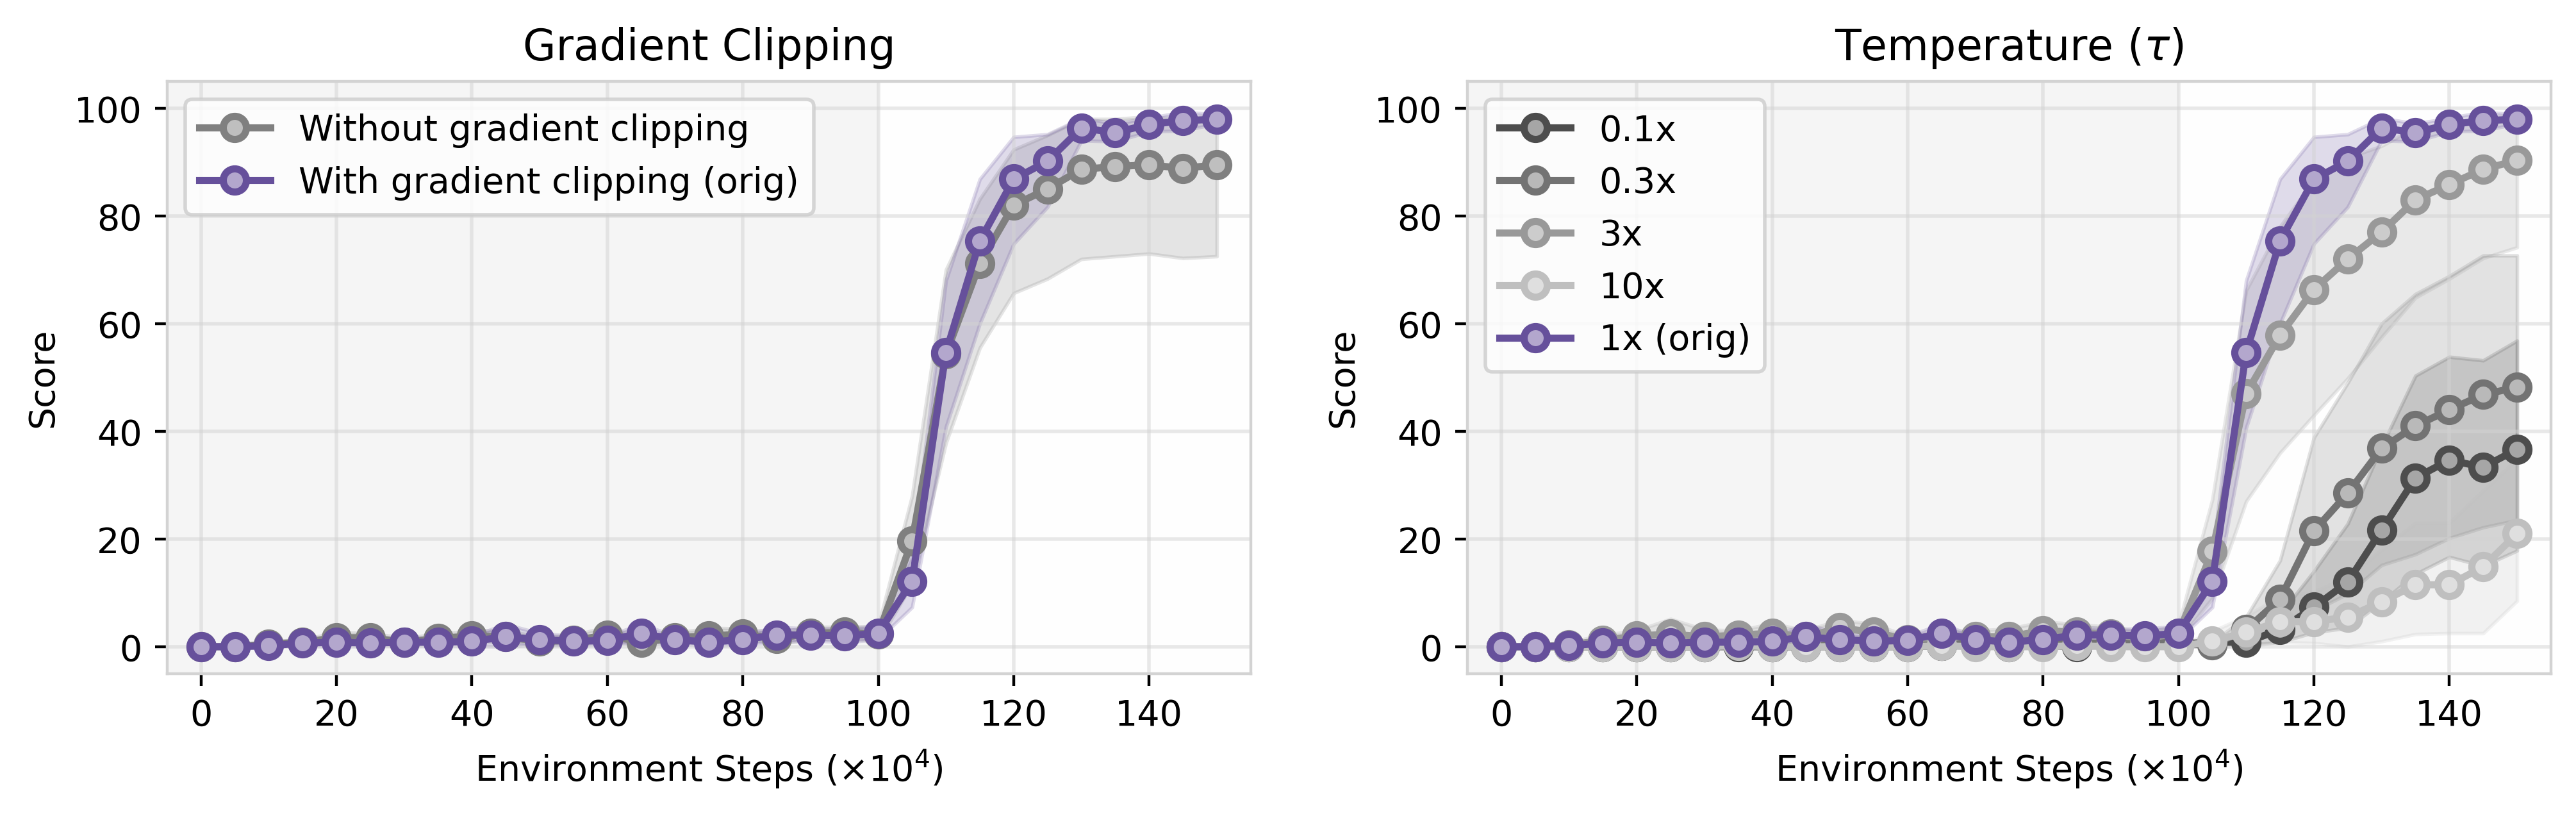

In [6]:
fig, (ax_gc, ax_temp) = plt.subplots(1, 2, figsize=(12, 3), dpi=400)

setup_ax(ax_gc, 'Gradient Clipping')
setup_ax(ax_temp, 'Temperature ($\\tau$)')

plot_data(ax_gc, "cube-triple-play-singletask-task2-v0", "QAM-E-NOCLIP", data_sensitive, label="Without gradient clipping", color=np.ones(3) * 0.5)
plot_data(ax_gc, "cube-triple-play-singletask-task2-v0", "QAM-E", data, label="With gradient clipping (orig)")
plot_data(ax_temp, "cube-triple-play-singletask-task2-v0", "QAM-E (0.1x tau)", data_sensitive, label="0.1x", color=np.ones(3) * 0.3)
plot_data(ax_temp, "cube-triple-play-singletask-task2-v0", "QAM-E (0.3x tau)", data_sensitive, label="0.3x", color=np.ones(3) * 0.45)
plot_data(ax_temp, "cube-triple-play-singletask-task2-v0", "QAM-E (3x tau)", data_sensitive, label="3x", color=np.ones(3) * 0.6)
plot_data(ax_temp, "cube-triple-play-singletask-task2-v0", "QAM-E (10x tau)", data_sensitive, label="10x", color=np.ones(3) * 0.75)
plot_data(ax_temp, "cube-triple-play-singletask-task2-v0", "QAM-E", data, label="1x (orig)")

ax_gc.legend()
ax_temp.legend()